# Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Debemos abrir el archivo csv porque al abrir el tipo pikle, el método SMOTETomek genera nulos en las variables categóricas. Se intentó convertir estas catergorías a numéricas, pero seguía sin reconocerlas.

## Archivo estandarizado y codificado

In [2]:
# Archivo balanceado codificado y estandarizado
df1 = pd.read_csv("../files_rl/4-heart-bal_encoding-estandarizado.csv", index_col=0)
df1.head(2)

,fastingbs,restingecg,exerciseangina,st_slope,heartdisease,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA,age,restingbp,maxhr,oldpeak,cholesterol
0,0,1,1,3,0,0,1,0,1,0,0,-1.076923,0.5,0.944444,-0.400000,0.870840
1,0,1,1,1,1,1,0,0,0,1,0,-0.384615,1.5,0.500000,0.266667,-1.185764


In [3]:
df1.dtypes

fastingbs           int64
restingecg          int64
exerciseangina      int64
st_slope            int64
heartdisease        int64
sex_F               int64
sex_M               int64
chest_ASY           int64
chest_ATA           int64
chest_NAP           int64
chest_TA            int64
age               float64
restingbp         float64
maxhr             float64
oldpeak           float64
cholesterol       float64
dtype: object

 ## Balanceo de variable respuesta con método `SMOTETomek()`

In [4]:
df1['heartdisease'].value_counts()

1    507
0    410
Name: heartdisease, dtype: int64

In [5]:
# Separar en X e y y en train y test
X = df1.drop('heartdisease', axis=1)
y = df1['heartdisease']

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [6]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res= os_us.fit_resample(X_train, y_train)

In [7]:
print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 1    356
0    285
Name: heartdisease, dtype: int64
..............................................................
Distribución después del ajuste 
 1    336
0    336
Name: heartdisease, dtype: int64


In [8]:
X_train_res.head(5)

,fastingbs,restingecg,exerciseangina,st_slope,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA,age,restingbp,maxhr,oldpeak,cholesterol
0,0,2,2,1,1,0,1,0,0,0,0.076923,-0.1,-0.222222,0.933333,-0.714066
1,0,1,1,3,0,1,0,0,1,0,-0.615385,1.0,-0.611111,-0.400000,-1.506519
2,0,1,1,1,1,0,0,1,0,0,-0.692308,-0.9,0.000000,-0.400000,-1.563123
3,0,3,2,1,0,1,1,0,0,0,0.000000,-1.0,-0.833333,-0.400000,-0.695198
4,0,1,1,1,0,1,1,0,0,0,0.000000,0.5,-0.916667,0.600000,-0.506519


In [9]:
X_train_res.isnull().sum()

fastingbs         0
restingecg        0
exerciseangina    0
st_slope          0
sex_F             0
sex_M             0
chest_ASY         0
chest_ATA         0
chest_NAP         0
chest_TA          0
age               0
restingbp         0
maxhr             0
oldpeak           0
cholesterol       0
dtype: int64

## Ajuste y predicción del modelo

In [10]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(X_train_res,y_train_res)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(X_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(X_test)

In [11]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample(8)

,Real,Predicted,Set
479,1,1,Train
861,0,0,Train
482,1,1,Train
711,1,0,Test
220,1,1,Train
582,0,0,Train
237,1,1,Train
753,0,0,Train


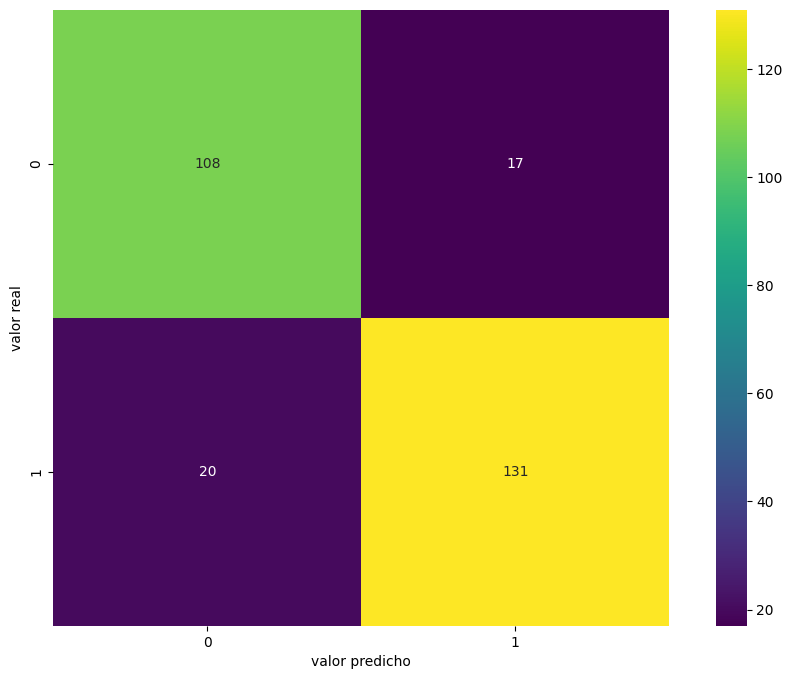

In [12]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [13]:
# Archivo balanceado codificado
df2 = pd.read_csv("../files_rl/4-heart-bal_encoding.csv", index_col=0)
df2.head(2)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,1,172,1,0.0,3,0,289.0,0,1,0,1,0,0
1,49,160,0,1,156,1,1.0,1,1,180.0,1,0,0,0,1,0


In [14]:
# separamos los datos en X e y

X2 = df2.drop("heartdisease", axis = 1)
y2 = df2["heartdisease"]

In [15]:
#dividimos en sets de entrenamiento y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7)

In [16]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res2, y_train_res2= os_us.fit_resample(X_train2, y_train2)

In [17]:
print (f"Distribution before resampling \n {y_train2.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res2.value_counts()}")

Distribution before resampling 
 1    348
0    293
Name: heartdisease, dtype: int64
..............................................................
Distribución después del ajuste 
 0    304
1    304
Name: heartdisease, dtype: int64


In [18]:
X_train_res2.head(5)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,53,155,1,2,160,1,0.3,3,175.000000,0,1,0,0,1,0
1,29,130,0,3,202,1,0.0,3,204.000000,0,1,0,1,0,0
2,42,145,0,1,99,2,0.0,1,246.592329,0,1,1,0,0,0
3,66,155,1,1,90,1,0.0,1,250.927027,1,0,1,0,0,0
4,48,120,0,1,125,1,0.0,3,195.000000,1,0,0,0,1,0


In [19]:
X_train_res2.isnull().sum()

age               0
restingbp         0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
cholesterol       0
sex_F             0
sex_M             0
chest_ASY         0
chest_ATA         0
chest_NAP         0
chest_TA          0
dtype: int64

## Ajuste y predicción del modelo

In [20]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg2 = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg2.fit(X_train_res2,y_train_res2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train2 = log_reg2.predict(X_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test2 = log_reg2.predict(X_test2)

In [21]:
train_df2 = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train2, 'Set': ['Train2']*len(y_train2)})
test_df2  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test2,  'Set': ['Test2']*len(y_test2)})
resultados2 = pd.concat([train_df2,test_df2], axis = 0)
resultados2.sample(8)

,Real,Predicted,Set
837,1,1,Test2
161,1,1,Train2
204,0,0,Train2
366,1,1,Train2
757,0,0,Test2
599,0,1,Test2
83,0,0,Train2
617,0,1,Test2


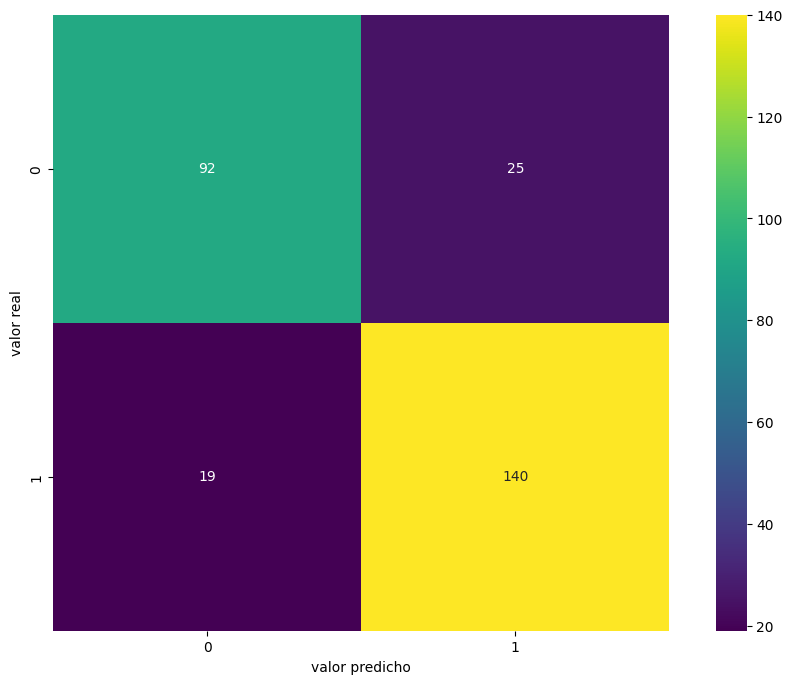

In [22]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr2 = confusion_matrix(y_test2, y_pred_test2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

## Interpretación de resultados

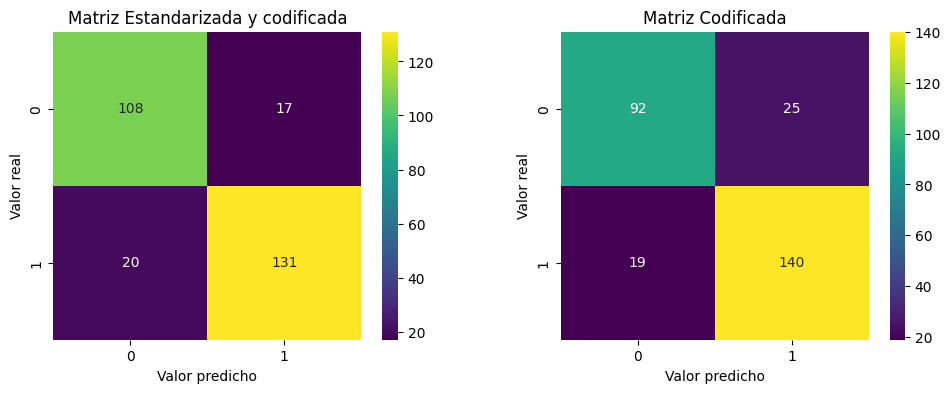

In [23]:
fig, ax  = plt.subplots(1, 2, sharex='col', figsize=(12, 4))

mat_lr1 = confusion_matrix(y_test, y_pred_test)
mat_lr2 = confusion_matrix(y_test2, y_pred_test2)

sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis", ax=ax[0])
ax[0].set_title("Matriz Estandarizada y codificada")
ax[0].set_ylabel("Valor real")
ax[0].set_xlabel("Valor predicho")

# MATRIZ DE CORRELACIÓN PARA DATOS 2

sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis", ax=ax[1])
ax[1].set_title("Matriz Codificada")
ax[1].set_ylabel("Valor real")
ax[1].set_xlabel("Valor predicho")

plt.show();


La variable respuesta `heartdisease` o `cardiopatía` está dividida de la siguiente forma: 

- 0: No, normal *no existe cardiopatía* 
- 1: Sí, cardiopaía *si existe cardiopatía* 

En este contexto, presentamos los valores comparados de los resultados obtenidos en la aplicación de dos modelos, uno creado con los datos estandarizados y codificados y otro modelos con los datos únicamente codificados.

**Respecto a la matriz del primer modelo (estandarizado y codificado)**

- En el recuadro de arriba a la derecha, de valor real 0 o normal, se evidencia que 104 de los casos fueron detectados de manera correcta, es decir, verdader positivo; mientras que 134 casos de 1, sí existe cardiopatía, se detectaron como verdaderos negativos. Consideramos que estos estos valores son buenos. 

- En esta matriz se observa que 23 casos cuyo valor real es 0, normal, se detectaron como 1, con cardiopatía, es decir, falsos negativos. En relación al valor real 1, se predijo que 22 casos eran 0 o nomales, es decir, falsos negativos.

**Respecto a la matriz del segundo modelo (datos codificados)**

- En el recuadro de arriba a la derecha, de valor real 0 o normal, se evidencia que 105 de los casos fueron detectados de manera correcta, es decir, verdader positivo; mientras que 134 casos de 1, sí existe cardiopatía, se detectaron como verdaderos negativos.

- En esta matriz se observa que respecto a la detección de los valores negativos, se detectaron 134 de manera correcta y 20 casos cuyo valor real es 0, normal, y se detectaron como 1, con cardiopatía, es decir, falsos negativos.